# sales prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data

In [3]:
data=pd.read_csv("Advertising.csv")

In [4]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
data=data.drop(labels="Unnamed: 0",axis=1)

In [7]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Data analysis on each category of advertising (Radio,TV,Newspaper)

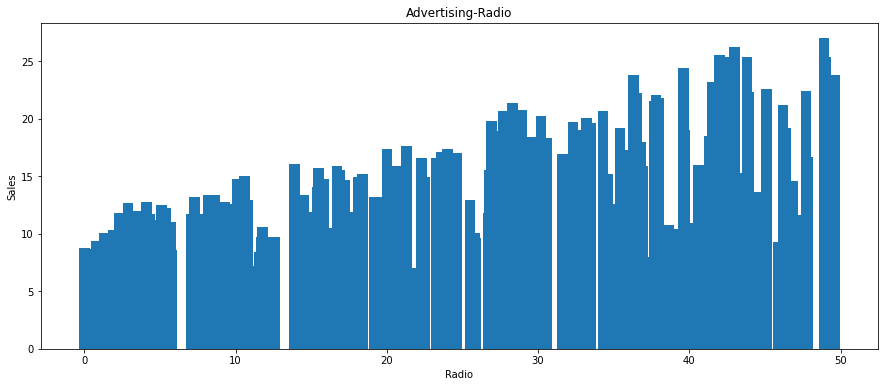

In [74]:
plt.figure(figsize=(15,6))
plt.bar(data["Radio"],data["Sales"],width=0.7)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Advertising-Radio")
plt.show()

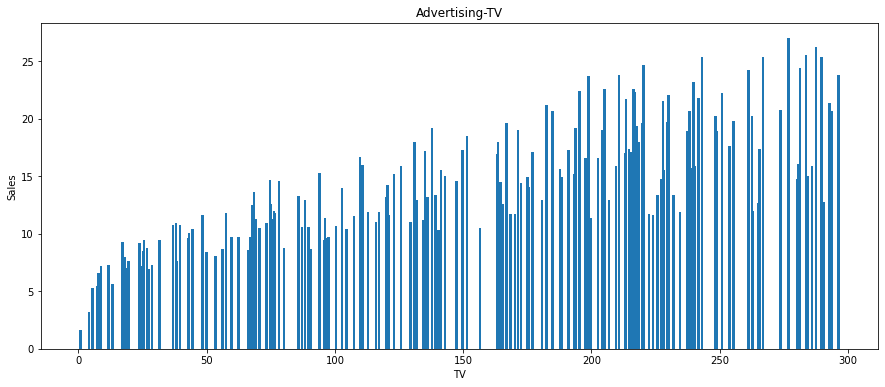

In [75]:
plt.figure(figsize=(15,6))
plt.bar(data["TV"],data["Sales"],width=1)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Advertising-TV")
plt.show()

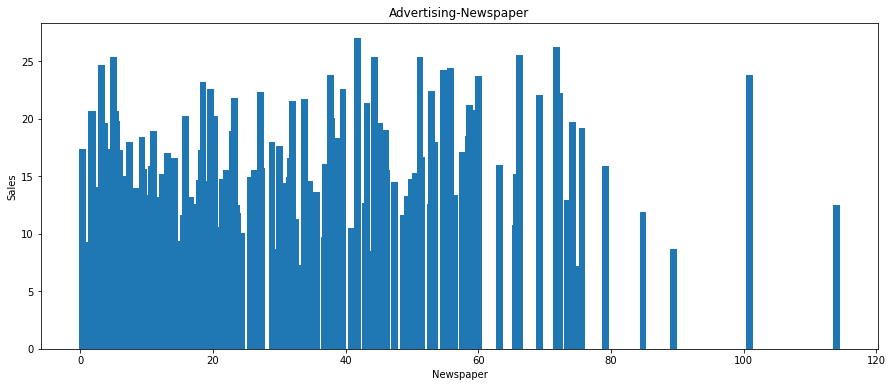

In [76]:
plt.figure(figsize=(15,6))
plt.bar(data["Newspaper"],data["Sales"],width=1)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Advertising-Newspaper")
plt.show()

conclusion:from the above three advertsing methods , advertising in news paper has more sales

In [49]:
x=data.drop(labels="Sales",axis=1)

In [50]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [51]:
y=data["Sales"]

In [52]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

scaling the data using standardscaler

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [53]:
temp=scaler.fit_transform(x)

# splitting the data

In [47]:
from sklearn.model_selection import train_test_split

In [54]:
 X_train, X_test, y_train, y_test =train_test_split(temp,y,test_size=0.2)

# using decision tree regresser algorithm with depth = 20 for prediction model

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
regressor=DecisionTreeRegressor(max_depth=20)

In [95]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [87]:
from sklearn.tree import plot_tree

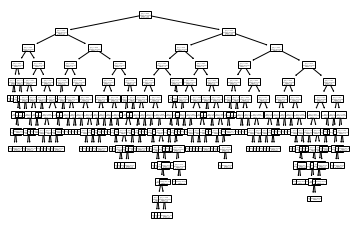

In [102]:
plot_tree(regressor)
plt.show()

In [97]:
y_pred=regressor.predict(X_test)

In [98]:
y_pred

array([15.3, 17.1, 12.9, 11.9,  7.6, 24.4, 10.8,  9.3, 10.5, 14.7, 12.3,
       14.7, 11.4,  9.7,  5.9, 12.2, 20.8, 23.8, 18.4, 14.8, 12.5, 15.6,
       15.7, 10.3, 12.9, 12.8, 12.9,  7.6,  8.5,  9.5, 16.1,  8.8, 18. ,
       17.2, 20.1, 16.1,  9.7, 16.1, 16.6, 19.8])

In [99]:
y_test.values

array([14.7, 16.9, 13.4, 12.4,  7. , 25.5, 10.9,  9.9, 11.3, 14.9, 11.7,
       14.4, 11.3,  8.6,  5.3, 12.5, 20.2, 22.2, 18.3, 15.5, 13.6, 14.9,
       15.9, 10.5, 11.9, 13.2, 13.3,  8.1,  9.2,  9.6, 15. ,  9.5, 17.3,
       15.9, 19.6, 15.9,  9.7, 14.8, 15.2, 20.7])

# accuracy score

In [100]:
regressor.score(X_test,y_test)

0.9695525217233357